In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

In [ ]:
df = pd.read_csv('datasets/Clean_Pandemic_Taxi_Data.csv')

In [ ]:
df.head()

In [ ]:
df.info()

In [5]:
df =  df.drop(['Unnamed: 0', 'tpep_pickup_datetime',
             'tpep_dropoff_datetime', 'store_and_fwd_flag', 'zone_PU',
             'Borough_PU', 'zone_DO', 'Borough_DO'], axis=1)
df_scaled = scale(df)
y = df[['total_amount']]
X = df.drop(['total_amount'], axis=1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg.coef_

array([[ 1.54227169e+00, -7.47855834e-03,  1.93583795e-03,
        -6.65133750e-02, -1.53586138e+09,  5.17304948e+08,
         2.91517628e-01,  1.00125957e+00,  6.90514896e-01,
        -1.54667428e+00,  1.03086352e+00,  1.00966474e+00,
         3.35085197e+00,  7.14245286e-01,  1.53586138e+09,
        -5.17304948e+08,  1.56296673e-01, -3.64495406e-01,
        -6.74234026e-01, -8.71488527e-01, -8.79087275e-01,
         1.79731389e+00,  1.74543964e+00,  1.76846814e+00,
         1.67075659e+00,  1.38727114e+00]])

In [7]:
print(linreg.score(X_test, y_test))
y_pred = linreg.predict(X_test)

0.9993530083988249


In [17]:
y_pred

array([[10.84091242],
       [14.13523259],
       [11.72799709],
       ...,
       [21.67591061],
       [11.72989406],
       [30.14277747]])

In [20]:
y_test.head()

,total_amount
4175322,10.70
1164045,14.16
3476962,11.76
505302,7.30
4498500,11.16


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


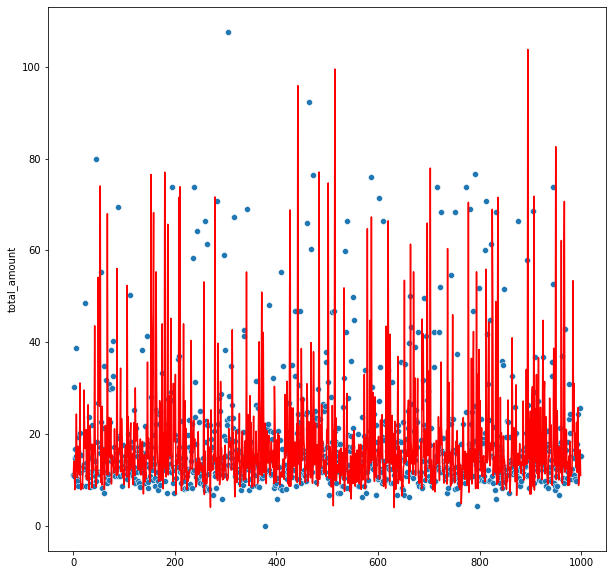

In [64]:
y_test_sample = y_test.sample(1000)
y_test_sample.index = np.arange(0, 1000)
index = y_test_sample.index
y_pred_sample = y_pred[index]
plt.figure(figsize=(10, 10))
sns.scatterplot(index, 'total_amount', data=y_test_sample)
plt.plot(index, y_pred_sample, c='red')

This shows an accuray of 99.93% which means that there should be a strong case of overefitting. This can cause a problem for new incoming data because it can begin to degrade the model's prediction ability. Overfitting means more bias and less variance which is not good in this case.

In [66]:
# I will attempt to use Ridge to try to regularize it and see how it goes
ridge = Ridge(alpha=0.5, normalize=True)
ridge.fit(X_train, y_train)
ridge.coef_

array([[ 1.98219719e-01,  6.70497692e-03,  8.62136347e-01,
         6.45839572e-01, -4.87438692e-04, -8.58211546e-04,
         6.97433236e-02,  4.02888040e-01,  2.28374765e-01,
        -1.31002392e+01,  9.96317458e-01,  1.11025368e+00,
         9.56173743e+00,  7.26086984e-01, -4.87438692e-04,
        -8.58211546e-04,  9.78490641e-01, -9.15915501e-01,
        -1.76246494e+00,  2.15496671e+00,  3.98994797e+00,
         1.95657827e+00,  1.15659478e+00, -1.48281702e+00,
         7.72018127e-01,  5.33797959e+00]])

In [67]:
# Normalizing the data helped to decrease the score which can help create more variance 
ridge.score(X_test, y_test)

0.9543723462726573

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


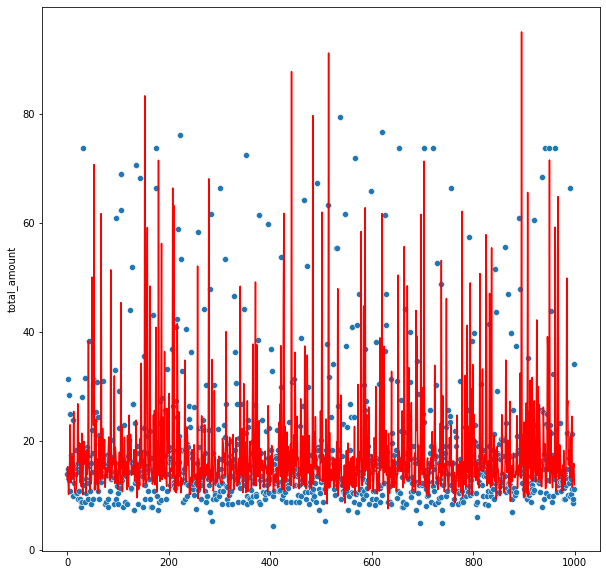

In [69]:
y_test_sample = y_test.sample(1000)
y_test_sample.index = np.arange(0, 1000)
y_pred_sample = ridge.predict(X_test)[:1000]
plt.figure(figsize=(10, 10))
sns.scatterplot(index, 'total_amount', data=y_test_sample)
plt.plot(index, y_pred_sample, c='red')